## Guided Project 04_Storytelling Data Visualization on Exchange Rates

### We want to do something about Euro rates

In [1]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_theme()
import matplotlib.style as style
import re

In [2]:
# import files and make copies

euro_data = pd.read_csv('euro-daily-hist_1999_2020.csv.zip')
exchange_rates = euro_data.copy()

In [3]:
# getting started

exchange_rates.info() 
# print('Head and Tail Test:', euro.head(), '\n', '\n', '\n', euro.tail())
exchange_rates.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5754 non-null   object 
 1   [Australian dollar ]      5754 non-null   object 
 2   [Bulgarian lev ]          5352 non-null   object 
 3   [Brazilian real ]         5486 non-null   object 
 4   [Canadian dollar ]        5754 non-null   object 
 5   [Swiss franc ]            5754 non-null   object 
 6   [Chinese yuan renminbi ]  5486 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5754 non-null   object 
 9   [Danish krone ]           5754 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5754 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5754 non-null   object 
 14  [Croatia

,[Iceland krona ],[Romanian leu ],[Turkish lira ]
count,3347.000000,5692.000000,5692.000000
mean,101.646182,3.877739,2.749620
std,32.909584,0.863913,1.954428
min,68.070000,1.291200,0.370100
25%,81.335000,3.517975,1.686250
50%,87.970000,4.219750,2.115450
75%,123.400000,4.485325,3.105300
max,305.000000,4.889300,10.148900


### Observations:

- 41 columns, 5754 rows
- There is missing data in various columns
- Action: Data types are mostly objects; columns will need to be converted to float64. 

In [4]:
# data cleaning

exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', ignore_index=True,
                           inplace=True)

# US dollar analysis
euro_to_dollar = pd.concat([exchange_rates['Time'], exchange_rates['US_dollar']], axis =1)
# print(euro_to_dollar.head(), '\n', '\n')
# print(euro_to_dollar['US_dollar'].value_counts()) # there are several columns with '-' as the designated value, let's drop them

euro_to_dollar_bool = euro_to_dollar['US_dollar'] != '-'
euro_to_dollar = euro_to_dollar[euro_to_dollar_bool]
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
# print(euro_to_dollar.info())

euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar['Month'] = euro_to_dollar['Time'].dt.month
euro_to_dollar['Day'] = euro_to_dollar['Time'].dt.day


print(euro_to_dollar)

# rolling window - let's see how the data breaks down by year, month and week
euro_by_year = euro_to_dollar.groupby('Year').mean()
euro_by_month = euro_to_dollar.groupby('Month').mean()
euro_by_week = euro_to_dollar['US_dollar'].rolling(7).mean()

print(euro_by_year)

           Time  US_dollar  Year  Month  Day
0    1999-01-04     1.1789  1999      1    4
1    1999-01-05     1.1790  1999      1    5
2    1999-01-06     1.1743  1999      1    6
3    1999-01-07     1.1632  1999      1    7
4    1999-01-08     1.1659  1999      1    8
...         ...        ...   ...    ...  ...
5749 2021-03-22     1.1926  2021      3   22
5750 2021-03-23     1.1883  2021      3   23
5751 2021-03-24     1.1825  2021      3   24
5752 2021-03-25     1.1802  2021      3   25
5753 2021-03-26     1.1782  2021      3   26

[5692 rows x 5 columns]
      US_dollar     Month        Day
Year                                
1999   1.065776  6.555985  15.617761
2000   0.923613  6.494118  15.752941
2001   0.895630  6.480315  15.763780
2002   0.945574  6.521569  15.749020
2003   1.131160  6.529412  15.760784
2004   1.243902  6.575290  15.818533
2005   1.244090  6.548638  15.603113
2006   1.255599  6.490196  15.764706
2007   1.370478  6.501961  15.878431
2008   1.470755  6.519531  1

Story ideas:

- #1: We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

- #2: We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

- #3: We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

## 2 How has the euro-dollar rate changed during the 2007-2008 financial crisis?

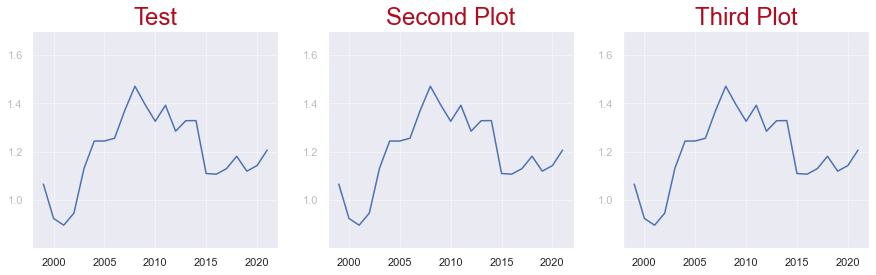

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols = 3, figsize=(15,4))
axes = [ax1, ax2, ax3]

# line graphs
ax1.plot(euro_by_year.index, euro_by_year['US_dollar'])
ax2.plot(euro_by_year.index, euro_by_year['US_dollar'])
ax3.plot(euro_by_year.index, euro_by_year['US_dollar'])


# # Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5) 


# titles
dictionary = {"fontsize": 24, "color": "#b00b1e"}
ax1.set_title('First Plot', fontdict=dictionary)
ax1.set_title('Test', fontdict={"fontsize": 24, "color": "#b00b1e", 'verticalalignment': 'baseline'})

ax2.set_title('Second Plot', fontdict=dictionary)
ax3.set_title('Third Plot', fontdict=dictionary)

# # commentary and visuals
# plt.arrow(x,y,dx,dy)
# ax1.text(x=200, y = 100, s = "somethig")
# ax2.text(x=200, y = 100, s = "somethig")
# ax3.text(x=200, y = 100, s = "somethig")

# # styling
# ax1.plot(euro_by_year['US_dollar'][:3], euro_by_year['US_dollar'][:3], color = '#b00b1e', linewidth=2.5)
# ax2.plot(euro_by_year['US_dollar'][4:6], euro_by_year['US_dollar'][4:6], color = '#b00b1e', linewidth=2.5)
# ax3.plot(euro_by_year['US_dollar'][6:8], euro_by_year['US_dollar'][6:8], color = '#b00b1e', linewidth=2.5)
plt.show()